## Import Library

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Read Image

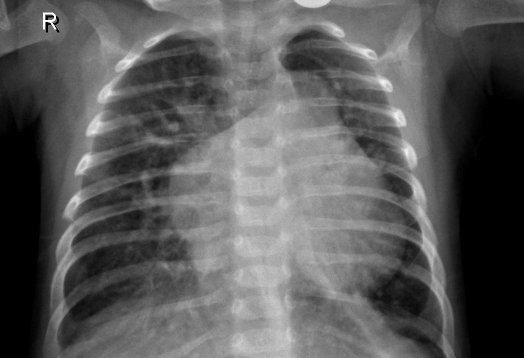

In [ ]:
image = cv2.imread("pneumonia.jpeg")
image = cv2.resize(image, (0, 0), fx = 0.5, fy = 0.5)
cv2_imshow(image)

## Gray Level Transformation

In [ ]:
def GLT (image, transform, coeff = 1.0, gamma = 1.0):
  #build lookup table to map the pixel value [0,255] to their gray level transformation 
  if transform == 'negative':
    table = np.array([256-1-i for i in np.arange (0,256)]).astype("uint8")

  elif transform == 'identity':
    table = np.array([i for i in np.arange (0,256)]).astype("uint8") 

  elif transform == 'log':
    table = np.array([10*coeff*(np.log10(1+i)) for i in np.arange (0,256)]).astype("uint8") 
  
  elif transform == 'invlog':
    table = np.array([10*coeff/(np.log10 (1+i)+1) for i in np.arange (0,256)]).astype("uint8")

  elif transform == 'root' :
    invGamma = 1.0/gamma 
    table = np.array([coeff*((i/255.0)**invGamma)*255 for i in np.arange (0,256)]).astype("uint8")

  elif transform == 'power':
    table = np.array([coeff*((i/255.0)**gamma)*255 for i in np.arange (0,256)]).astype("uint8") 
    
  return cv2.LUT(image, table)

### Identity

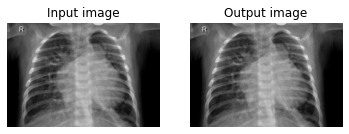

In [ ]:
img = cv2.imread('pneumonia.jpeg')
transform = 'identity'
coeff = 1 # For negative c = -1; for identity c = 1; for other, c is integer 
gamma = 2.5 # Gamma is used for root and power 

out_img = GLT(img, transform, coeff = coeff, gamma = gamma) 

plt.subplot(121) 
plt.imshow(img, 'gray') 
plt.title('Input image', fontsize=12)
plt.axis("off") 

plt.subplot(122) 
plt.imshow(out_img, 'gray') 
plt.title('Output image', fontsize=12) 
plt.axis("off") 
plt.show()

### Negative

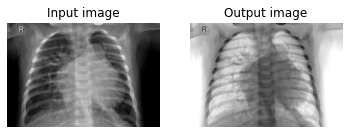

In [ ]:
img = cv2.imread('pneumonia.jpeg')
transform = 'negative'
coeff = -1 # For negative c = -1; for identity c = 1; for other, c is integer 
gamma = 2.5 # Gamma is used for root and power 

out_img = GLT(img, transform, coeff = coeff, gamma = gamma) 

plt.subplot(121) 
plt.imshow(img, 'gray') 
plt.title('Input image', fontsize=12)
plt.axis("off") 

plt.subplot(122) 
plt.imshow(out_img, 'gray') 
plt.title('Output image', fontsize=12) 
plt.axis("off") 
plt.show()

### Log

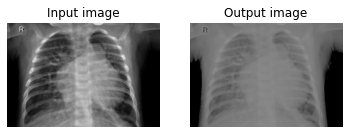

In [ ]:
img = cv2.imread('pneumonia.jpeg')
transform = 'log'
coeff = 6 # For negative c = -1; for identity c = 1; for other, c is integer 
gamma = 2.5 # Gamma is used for root and power 

out_img = GLT(img, transform, coeff = coeff, gamma = gamma) 

plt.subplot(121) 
plt.imshow(img, 'gray') 
plt.title('Input image', fontsize=12)
plt.axis("off") 

plt.subplot(122) 
plt.imshow(out_img, 'gray') 
plt.title('Output image', fontsize=12) 
plt.axis("off") 
plt.show()

### Inverse log

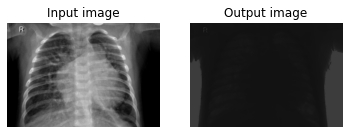

In [ ]:
img = cv2.imread('pneumonia.jpeg')
transform = 'invlog'
coeff = 6 # For negative c = -1; for identity c = 1; for other, c is integer 
gamma = 2.5 # Gamma is used for root and power 

out_img = GLT(img, transform, coeff = coeff, gamma = gamma) 

plt.subplot(121) 
plt.imshow(img, 'gray') 
plt.title('Input image', fontsize=12)
plt.axis("off") 

plt.subplot(122) 
plt.imshow(out_img, 'gray') 
plt.title('Output image', fontsize=12) 
plt.axis("off") 
plt.show()

### Power

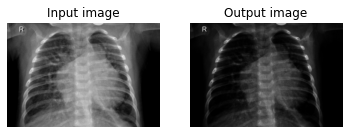

In [ ]:
img = cv2.imread('pneumonia.jpeg')
transform = 'power'
coeff = 1 # For negative c = -1; for identity c = 1; for other, c is integer 
gamma = 2.5 # Gamma is used for root and power 

out_img = GLT(img, transform, coeff = coeff, gamma = gamma) 

plt.subplot(121) 
plt.imshow(img, 'gray') 
plt.title('Input image', fontsize=12)
plt.axis("off") 

plt.subplot(122) 
plt.imshow(out_img, 'gray') 
plt.title('Output image', fontsize=12) 
plt.axis("off") 
plt.show()

### Root

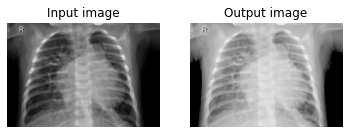

In [ ]:
img = cv2.imread('pneumonia.jpeg')
transform = 'root'
coeff = 1 # For negative c = -1; for identity c = 1; for other, c is integer 
gamma = 2.5 # Gamma is used for root and power 

out_img = GLT(img, transform, coeff = coeff, gamma = gamma) 

plt.subplot(121) 
plt.imshow(img, 'gray') 
plt.title('Input image', fontsize=12)
plt.axis("off") 

plt.subplot(122) 
plt.imshow(out_img, 'gray') 
plt.title('Output image', fontsize=12) 
plt.axis("off") 
plt.show()

## Piecewise-Linear Transformations

### Piecewise linear contrast stretching

Contrast stretching (often called normalization) is a simple image enhancement technique that attempts to improve the contrast in an image by 'stretching' the range of intensity values it contains to span a desired range of values

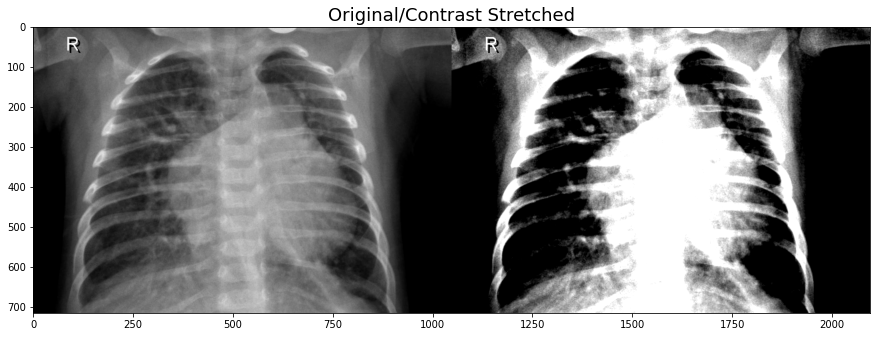

In [ ]:
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
img = cv2.imread('pneumonia.jpeg',0) 
r1 = 70
s1 = 0
r2=140
s2 = 255
pixelVal_vec = np.vectorize(pixelVal)
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)
equ=np.hstack((img,contrast_stretched))
plt.figure(figsize=[15,20])
plt.title("Original/Contrast Stretched", fontsize=18)
plt.imshow(equ,'gray')
plt.show()

### Gray Level Slicing (choose your interest part to slice)

Focuses on enhancing a specific range of grey level in an image. The intervals are pre-defined and pixels falling in that range are manipulated. This can be used to brighten the desired range of grey level while preserving the background quality in the range.

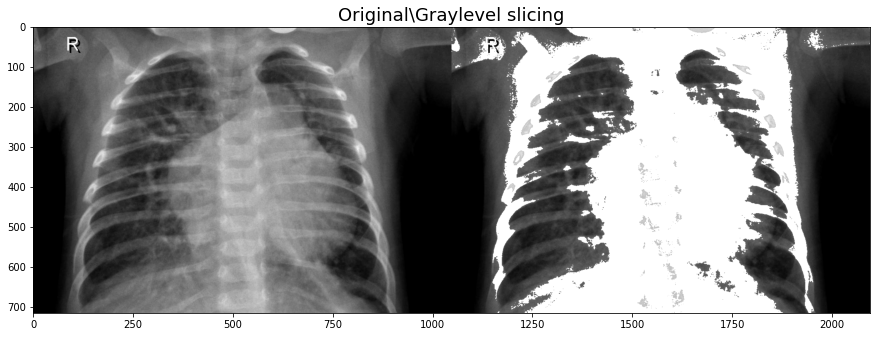

In [ ]:
# Load the image
img = cv2.imread("pneumonia.jpeg",0)

#  Find width and height of image
row, column = img.shape

#  Create an zeros array to store the sliced image
img1 = np.zeros((row,column),dtype = 'uint8')
#  Specify the min and max range
min_range = 100
max_range = 190
#  Loop over the input image and if pixel value lies in desired range set it to 255 otherwise set it to 0.
for i in range(row):
    for j in range(column):
        if img[i,j] > min_range and img[i,j] < max_range:
            img1[i,j] = 255
        else:
            img1[i,j] = img[i,j]

plt.figure(figsize=[15,20])
equ=np.hstack((img,img1))
plt.title('Original\Graylevel slicing',fontsize=18)
plt.imshow(equ,'gray')
plt.show()


image after applying the transformation display a high value of all gray levels in the range of interest and a low value for all other gray levels

### Bit Plane Slicing

Bit plane slicing is a method of representing an image with one or more bits of the byte used for each pixel.

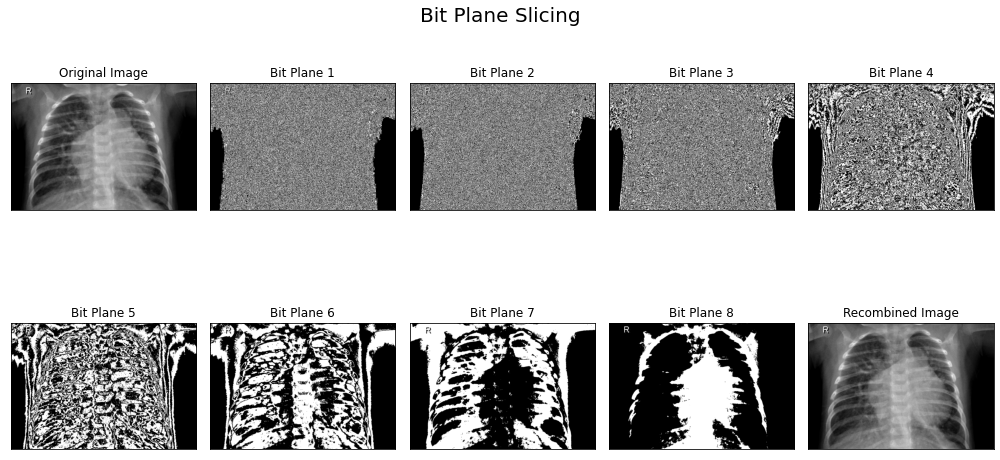

In [ ]:
import numpy as np
import cv2

bp = cv2.imread('pneumonia.jpeg',0)
bit_title = ["Original Image", "Bit Plane 1", "Bit Plane 2", "Bit Plane 3", "Bit Plane 4",
             "Bit Plane 5", "Bit Plane 6", "Bit Plane 7", "Bit Plane 8", "Recombined Image"]

# Method : Using mod
b1 = np.mod(bp, 2)
b2 = np.mod(np.floor(bp/2), 2)
b3 = np.mod(np.floor(bp/4), 2)
b4 = np.mod(np.floor(bp/8), 2)
b5 = np.mod(np.floor(bp/16), 2)
b6 = np.mod(np.floor(bp/32), 2)
b7 = np.mod(np.floor(bp/64), 2)
b8 = np.mod(np.floor(bp/128), 2)

bb = (2 * (2 * (2 * (2 * (2 * (2 * (2 * b8 + b7) + b6) + b5) + b4) + b3) + b2) + b1);

list_bit = [bp, b1, b2, b3, b4, b5, b6, b7, b8, bb]


fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(14, 8), subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle("Bit Plane Slicing", fontsize=20, y=0.95)

for ax, i, title in zip(axes.ravel(), list_bit, bit_title):
  ax.set_title(title)
  ax.imshow(i, cmap='gray')
plt.tight_layout()
plt.show()

Above is screenshot of obtained output which are 10 images in 10 subplot. 1st one is original image. 2nd image is representation of extracted 1st bit (Least significant bit) image, 3rd one is of 2nd bit and so on. 9th image is extracted 8th bit (Most significant bit) image and 10th image is obtained after recombining of all 8 extracted bit.

## Histogram Equalization

Histogram equalization distributes the gray level to reach the maximum gray level (white) because the cumulative distribution function equals 1 when 0 ≤ r ≤ L−1

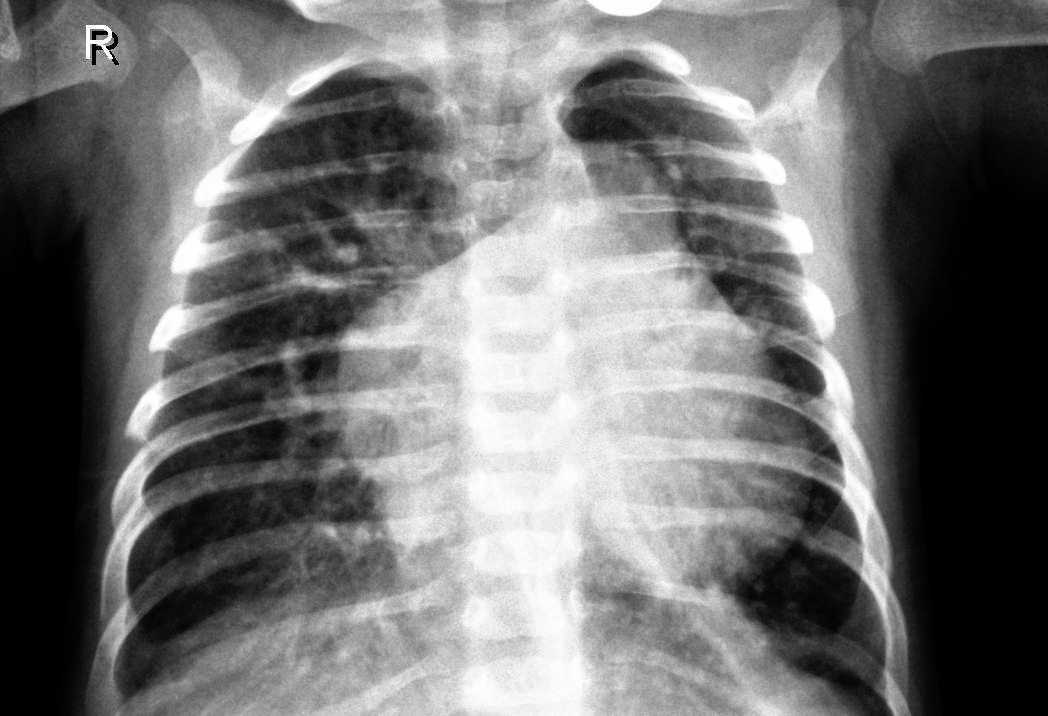

In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
img = cv2.imread("pneumonia.jpeg",0)
im5 = histeq(img)
cv2_imshow(im5)

OpenCV has a function to do this, cv.equalizeHist(). Its input is just grayscale image and output is our histogram equalized image.


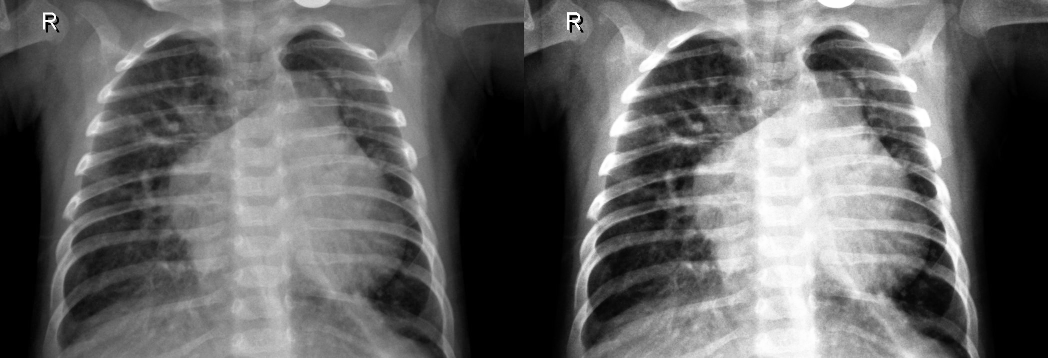

In [ ]:
img = cv2.imread('pneumonia.jpeg',0)
img = cv2.resize(img, (0, 0), fx = 0.5, fy = 0.5)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2_imshow(res)

compare the original and the equalized histograms.

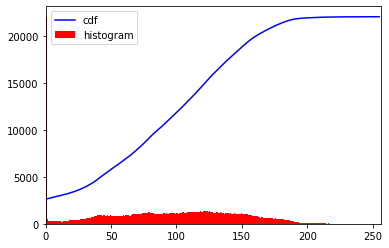

In [ ]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

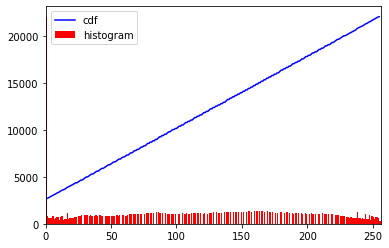

In [ ]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Unlike the original histogram, the pixel intensity values now range from 0 to 255 on the X-axis. In a way, the original histogram has been stretched to the far ends.